In [7]:
import torch
import matplotlib.pyplot as plt

In [5]:
# 모델 학습 코드

# interface for model prediction
# 1.모델에 데이터 통과
y_hat = model(x)
# 2.loss 계산
loss = criterion(y_hat, y)

optimizer.zero_grad()
# 3.미분함
loss.backward()
# 4.업데이트
optimizer.step()
# 이거 4줄로 끝

NameError: name 'model' is not defined

In [3]:
# Linear regression
# 입력과 출력 관계를 linear으로 놓고 알아내는거임

# input과 output의 관계를 linear하게 놓고 학습하는것 e.g. y = ax + b
# 중에 최적의 a와 b를 찾아내는것
# 최적의 a와 b를 찾는다는것은 loss가 최소가 되는 a,b를 찾는다는것
# 이 입력에는 이 출력이 나와야함 = loss를 최소화

# 최적의 Loss 를 찾는방법
# Gradient Descent  2차 function 내에서 gradient 가 0이 되는 지점을 찾는 방식임. Gradient 가 양수면 반대쪽으로 가면 낮아지는 방향이니깐 그런방식으로 함


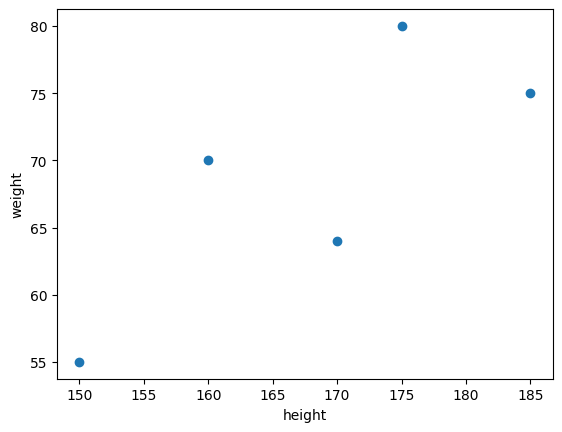

In [12]:
# 키와 몸무게의 관계

x = torch.tensor([150,160,170,175,185.])
y = torch.tensor([55,70,64,80,75.])
N = len(x)
plt.plot(x,y,'o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()
# N이란 데이터의 개수 len(x) = 5

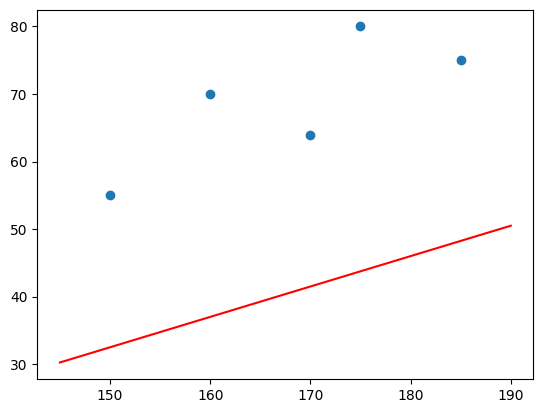

In [ ]:
# 초기값 설정
a = 0.45 # 기울기
b = -35 # y절편
x_plot = torch.linspace(145,190,100)
# x_plot 은 145부터 190까지 100개의 점을 균일하게 찍은거임
y_plot = a * x_plot + b
# y_plot 은 직선의 방정식 y = ax + b
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

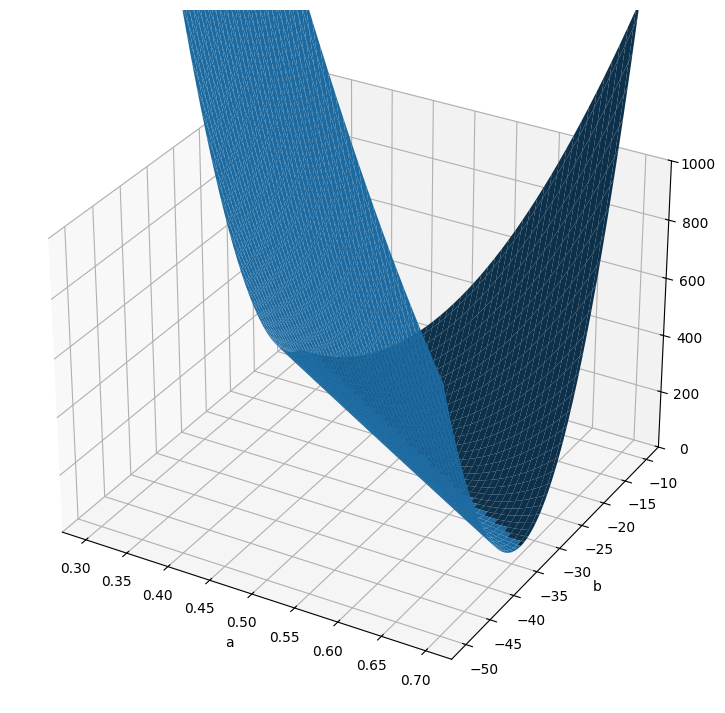

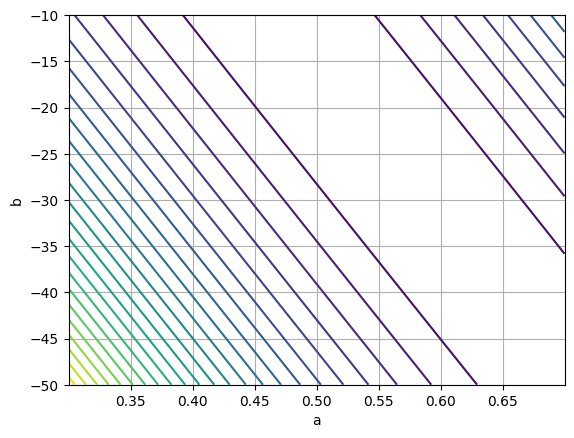

In [17]:
# initial 을 만들었으니 이제 학습시켜야함
# a,b 값을 조정하면서 loss를 최소화 시켜야함
a = 0.5 + torch.linspace(-0.2,0.2,100) # a는 0.3 ~ 0.7 값을 100개 찍음
b = -30 + torch.linspace(-20,20,100) # b는 -50 ~ -10 값을 100개 찍음

L = torch.zeros(len(b), len(a)) # loss 값을 저장할 100x100 행렬 생성 초기화 한거임 zeros로 영행렬
for i in range(len(b)): # i 는 총 100번 돈다
    for j in range(len(a)): # j 도 총 100번 돈다
        for n in range(N): # n 은 데이터 개수 5번 돈다
            L[i,j] = L[i,j] + (y[n] - (a[j]*x[n] + b[i]))**2 # loss 계산 y[n] 은 실제값  (a[j]*x[n] + b[i]) 는 예측값
            # 실제값 - 예측값 의 제곱을 더해줘서 업데이트 시켜줌
L = L / N # MSE 평균제곱오차로 바꿔줌

plt.figure(figsize=(10,9))
ax = plt.axes(projection='3d')
A,B = torch.meshgrid(a,b)
ax.plot_surface(A,B,L);
ax.set_xlabel('a'); ax.set_ylabel('b');
ax.set_zlim([0,1000]) # zlim 은 z축의 범위를 0~1000으로 설정

plt.figure()
plt.contour(a,b,L,30) # 이건 등고선 그래프 그리는거임 contour는 2차원 평면에 3차원 그래프를 표현하는 방법임
plt.xlabel('a'); plt.ylabel('b');
plt.grid()


In [19]:
L

tensor([[4717.8999, 4625.1914, 4533.4097,  ...,   37.8939,   35.0339,
           33.1000],
        [4662.7900, 4570.6304, 4479.3970,  ...,   35.9905,   33.6789,
           32.2935],
        [4608.0068, 4516.3955, 4425.7109,  ...,   34.4135,   32.6504,
           31.8136],
        ...,
        [ 892.4518,  852.9494,  814.3732,  ..., 1373.4280, 1423.7732,
         1475.0457],
        [ 869.0127,  830.0588,  792.0311,  ..., 1403.1949, 1454.0889,
         1505.9099],
        [ 845.8998,  807.4945,  770.0153,  ..., 1433.2881, 1484.7303,
         1537.1000]])

In [ ]:
print(torch.min(L)) # 최소 loss 값 출력
a_opt = A[L==torch.min(L)] # 최소 loss 값일때의 a 값
b_opt = B[L==torch.min(L)] # 최소 loss 값일때의 b 값
print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")
# 기울기는 0.5424, y절편은 -23.7374가 최적임

tensor(29.0315)
optimal a = tensor([0.5424])
optimal b = tensor([-23.7374])


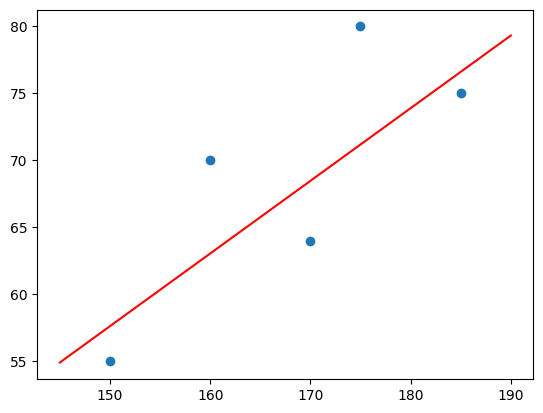

In [25]:
x_plot = torch.linspace(145,190,100)
y_plot = a_opt * x_plot + b_opt
plt.plot(x,y,'o') # 여기서 o는 점으로 그리라는 뜻임
plt.plot(x_plot,y_plot,'r') # 여기서 r은 red 색깔로 그리라는 뜻임

In [ ]:
a = torch.tensor([0.45], requires_grad=True) # requires_grad=True 로 설정해야 미분가능
b = torch.tensor([-35.], requires_grad=True) 
